# <font color=blue>Project Description</font>

-> Project Name: Auto Insurance

-> Datasets:
+ train_auto
+ test_auto

-> Goal: Based on the information from the train_auto dataset to make a prediction on the "TARGET_FLAG" variable in the test_auto dataset, e.g. to predict the claims to the insurance company.

-> Processes:
+ Data Analysis
+ Data Pre-processing
+ Modeling
+ Evaluation

-> Project output: prediction.csv 

# 1-Data Analysis
## 1-1 Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
#Remove warnings
warnings.filterwarnings("ignore")

## 1-2 Import the Dataset
**Import train and test datasets**

In [2]:
df_train = pd.read_csv("train_auto.csv")
display(df_train.head())
print(f"train dataset = {df_train.shape[0]} rows * {df_train.shape[1]} columns" )

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


train dataset = 8161 rows * 26 columns


In [3]:
df_test = pd.read_csv("test_auto.csv")
display(df_test.head())
print(f"train dataset = {df_test.shape[0]} rows * {df_test.shape[1]} columns" )

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


train dataset = 2141 rows * 26 columns


<font color=blue>1. The train dataset is a data frame of 8161 rows * 26 columns, while the test dataset is a 2141 rows * 26 columns data frame.</font>  
<font color=blue>2. The prediction “TARGET_FLAG” is a binary variable. Value "1" represents "claim" while value "0" represents "not-claim". Therefore, for predicting a binary variable, I will use Classification in Machine Learning. </font>  

## 1-3 Data Exploration and Cleaning
**Check the missing values**

In [4]:
# Check the missing values in train dataset
train_missrow = df_train.isnull().sum().sort_values(ascending=False)
train_missrow_per = ((df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False))*100
train_miss = pd.concat([train_missrow, train_missrow_per], axis=1, keys=['Total missing', 'Percentage in train dataset'])
print(train_miss.head(30))
print(f"There are {len(df_train.loc[df_train.isna().any(1)])} rows containing missing values in the train dataset, accounting for {len(df_train.loc[df_train.isna().any(1)]) / len(df_train)* 100:.1f}% of the total rows in the train dataset.")

             Total missing  Percentage in train dataset
JOB                    526                     6.445289
CAR_AGE                510                     6.249234
HOME_VAL               464                     5.685578
YOJ                    454                     5.563044
INCOME                 445                     5.452763
AGE                      6                     0.073520
CAR_USE                  0                     0.000000
MVR_PTS                  0                     0.000000
REVOKED                  0                     0.000000
CLM_FREQ                 0                     0.000000
OLDCLAIM                 0                     0.000000
RED_CAR                  0                     0.000000
CAR_TYPE                 0                     0.000000
TIF                      0                     0.000000
BLUEBOOK                 0                     0.000000
INDEX                    0                     0.000000
TRAVTIME                 0                     0

<font color=blue>There is no missing value (NaN) in prediction variable “TARGET_FLAG” in the train dataset. However, there are some missing values in feature variables in the train dataset. Therefore, I will check the missing values and outliers of feature variables before checking the distribution of prediction variable in the train dataset.</font>  

<font color=blue>Although the missing-value rows account for around 1/4 of the total rows in the train dataset, those missing-value rows are going to be deleted considering that there are still more than 1000 rows left after deletion.</font>  
<font color=blue>Be careful: If the dataset is small (<1000 rows), should think about the methods to replace the missing values.</font> 

In [5]:
# Remove the rows containing the missing values
train_clean = df_train.dropna(axis=0)
train_clean = train_clean.reset_index(drop=True)
train_clean.shape

(6045, 26)

**Explore the feature columns**

In [6]:
# Check the feature variables that needed to be modified
train_clean.select_dtypes(include=["object"])

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
0,"$67,349",No,$0,z_No,M,PhD,Professional,Private,"$14,230",Minivan,yes,"$4,461",No,Highly Urban/ Urban
1,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,Commercial,"$14,940",Minivan,yes,$0,No,Highly Urban/ Urban
2,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,Private,"$4,010",z_SUV,no,"$38,690",No,Highly Urban/ Urban
3,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,Commercial,"$17,430",Sports Car,no,$0,No,Highly Urban/ Urban
4,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,Private,"$11,200",z_SUV,no,$0,No,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,"$6,256",No,$0,z_No,M,z_High School,Student,Private,"$5,600",Pickup,no,$0,No,z_Highly Rural/ Rural
6041,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,Commercial,"$27,330",Panel Truck,yes,$0,No,z_Highly Rural/ Rural
6042,"$164,669",No,"$386,273",Yes,M,PhD,Manager,Private,"$13,270",Minivan,no,$0,No,Highly Urban/ Urban
6043,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,Private,"$22,550",Minivan,no,$0,No,Highly Urban/ Urban


<font color=blue>The above 14 columns need to be formatted for the Classification modelling.</font>

In [7]:
# Format the columns representing the amount of money
money_col = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
# Convert string to number by removing first '$' and ','
for col in money_col:
    train_clean[col]=train_clean[col].str.replace('$', '').str.replace(',','')
    train_clean[col]=pd.to_numeric(train_clean[col])
train_clean.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349,No,0,...,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449,No,257252,...,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039,No,124191,...,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,7,1,2946.0,0,34.0,1,12.0,125301,Yes,0,...,17430,1,Sports Car,no,0,0,No,0,7.0,Highly Urban/ Urban
4,12,1,2501.0,0,34.0,0,10.0,62978,No,0,...,11200,1,z_SUV,no,0,0,No,0,1.0,Highly Urban/ Urban


In [8]:
# Format the columns representing categorical variables
cate_col = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY']
# Check how many categories in each column
for col in cate_col:
    print(col,train_clean[col].unique())

PARENT1 ['No' 'Yes']
MSTATUS ['z_No' 'Yes']
SEX ['M' 'z_F']
EDUCATION ['PhD' 'z_High School' 'Bachelors' 'Masters' '<High School']
JOB ['Professional' 'z_Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']
CAR_USE ['Private' 'Commercial']
CAR_TYPE ['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Pickup' 'Panel Truck']
RED_CAR ['yes' 'no']
REVOKED ['No' 'Yes']
URBANICITY ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


<font color=blue>1-As we can see that there is a "z_" in some category names. I will remove the "z_" in the category names.</font>  

<font color=blue>2-The feature variables which have no order preference (such as 'PARENT1','MSTATUS','SEX','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'), will be converted by using One Hot encoding. However, this will add many additional columns and increase redundancy. So here I will use Dummy encoding (dropping the first column) instead for those feature variables which have only two categories.</font>  

<font color=blue>3-The feature variables, which have order preference (such as 'EDUCATION', will be converted by using Label encoding.</font>

In [9]:
# Remove 'z_' in the category names
remove_z_ = ['MSTATUS','SEX','EDUCATION','JOB','CAR_TYPE','URBANICITY']
for col in remove_z_:
    train_clean[col] = train_clean[col].str.replace('z_','')
train_clean.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349,No,0,...,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449,No,257252,...,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039,No,124191,...,4010,4,SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,7,1,2946.0,0,34.0,1,12.0,125301,Yes,0,...,17430,1,Sports Car,no,0,0,No,0,7.0,Highly Urban/ Urban
4,12,1,2501.0,0,34.0,0,10.0,62978,No,0,...,11200,1,SUV,no,0,0,No,0,1.0,Highly Urban/ Urban


In [10]:
# Format the columns containing only 2 no order preference categorical variables
# Use Dummy encoding
# Transfer the variables in string into binary values
df_dummy = pd.get_dummies(train_clean[['PARENT1','MSTATUS','SEX','CAR_USE','RED_CAR','REVOKED','URBANICITY']], 
                          prefix=['PARENT1','MSTATUS','SEX','CAR_USE','RED_CAR','REVOKED','URBANICITY'], drop_first = True)
df_dummy

,PARENT1_Yes,MSTATUS_Yes,SEX_M,CAR_USE_Private,RED_CAR_yes,REVOKED_Yes,URBANICITY_Highly Urban/ Urban
0,0,0,1,1,1,0,1
1,0,0,1,0,1,0,1
2,0,1,0,1,0,0,1
3,1,0,0,0,0,0,1
4,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
6040,0,0,1,1,0,0,0
6041,0,0,1,0,1,0,0
6042,0,1,1,1,0,0,1
6043,0,1,0,1,0,0,1


In [11]:
# Format the columns containing more than 2 no order preference categorical variables
# Use One Hot encoding
# Transfer the variables in string into binary values
df_onehot = pd.get_dummies(train_clean[['JOB','CAR_TYPE']], prefix=['JOB','CAR_TYPE'])
df_onehot

,JOB_Blue Collar,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6041,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6042,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6043,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [12]:
# Format the columns containing order preference categorical variables
# Use Label encoding
# Transfer the variables in string into numerical values
from sklearn.preprocessing import LabelEncoder
df_label = LabelEncoder()
train_clean['EDUCATION'] = df_label.fit_transform(train_clean['EDUCATION'])
train_clean['EDUCATION'].unique()

array([4, 2, 1, 3, 0])

<font color=blue>The numerical values now in the column "EDUCATION" represent: 4='PhD', 2='High School', 1='Bachelors', 3='Masters', 0='<High School'.</font>

**Check the outliers in the feature columns**

In [13]:
# Outliers in train dataset
train_clean.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,5090.021340,0.265012,1479.662715,0.173201,44.628453,0.743424,10.494624,58177.013234,150102.074607,1.709677,33.694293,15235.609595,5.360298,4004.875600,0.784119,1.699752,7.920926
std,2980.105025,0.441376,4553.172055,0.515424,8.707805,1.132740,4.138508,43826.975075,123728.720923,1.134523,15.892961,8040.962717,4.144664,8822.509329,1.153884,2.157899,5.583880
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,2470.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,26748.000000,0.000000,1.000000,23.000000,9170.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5060.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,51624.000000,159152.000000,2.000000,33.000000,14080.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7667.000000,1.000000,1037.000000,0.000000,51.000000,1.000000,13.000000,81287.000000,233053.000000,2.000000,44.000000,20120.000000,7.000000,4546.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,85523.653347,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,4.000000,142.000000,65970.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


<font color=blue>In column "CAR_AGE", there is an outlier value of -3. Clearly, the car age can not be negative.</font>

In [14]:
# Check how many rows contain the outlier 
# outlier in this dataset is "CAR_AGR" = -3
train_clean.loc[train_clean['CAR_AGE'] == -3]

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
5179,8772,1,1469.0,0,47.0,0,12.0,48696,No,212014,...,15390,4,Pickup,no,33521,3,Yes,1,-3.0,Highly Urban/ Urban


<font color=blue>There is only 1 row having this error on CAR_AGE. Usually I can delete this row directly. However, this customer showed a history of claim. Therefore, I will correct the error and then keep this row.</font>  
<font color=blue>I assume the "-3" is a error while entering the namber. I will change the "-3" to "3".</font>

In [15]:
# Deal with the outlier
train_clean['CAR_AGE'].replace(-3.0,3.0,inplace=True)
train_clean['CAR_AGE'].describe()

count    6045.000000
mean        7.921919
std         5.582472
min         0.000000
25%         1.000000
50%         8.000000
75%        12.000000
max        28.000000
Name: CAR_AGE, dtype: float64

<font color=blue>Now all the data issues are cleaned. I will create a dataframe to put all the processed feature columns (viariables) for training.</font> 

**Create new dataframes to store the processed data for modelling**

In [16]:
# Create a new dataframe to keep the processed feature columns
X = pd.DataFrame(index=train_clean.index)
# 1-Add the columms containing the numerical values into the new dataset
processed_col = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','EDUCATION','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE']
for col in processed_col:
    X[col] = train_clean[col]
# 2-Add the columns which were the categorical columns
df_cate = pd.merge(df_dummy,df_onehot,right_index=True,left_index=True)
X = pd.merge(X,df_cate,right_index=True,left_index=True)
display(X.head())
X.shape

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,...,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van
0,0,60.0,0,11.0,67349,0,4,14,14230,11,...,0,0,1,0,1,0,0,0,0,0
1,0,43.0,0,11.0,91449,257252,2,22,14940,1,...,0,0,0,0,1,0,0,0,0,0
2,0,35.0,1,10.0,16039,124191,2,5,4010,4,...,0,0,0,0,0,0,0,1,0,0
3,0,34.0,1,12.0,125301,0,1,46,17430,1,...,0,0,0,0,0,0,0,0,1,0
4,0,34.0,0,10.0,62978,0,1,34,11200,1,...,0,0,0,0,0,0,0,1,0,0


(6045, 35)

In [17]:
# Create a dataframe to keep the predicted column
y = train_clean["TARGET_FLAG"]
y.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_FLAG, dtype: int64

<font color=blue>Now the dataset for training and validation (here I use "validation" instead of "test" to avoid the confusion with test dataset) is well prepared.</font>  
<font color=blue>But there is one last thing to do. We can see that the feature values are in a large range. In order to eliminate the effect of unit and scale differences between features, and to treat each dimension feature equally, I will normalize the features.</font> 

**Normalize the feature values**

In [18]:
# Normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.33606395,  1.76540689, -0.65636072,  0.1221257 ,  0.20929452,
        -1.21325502,  2.01892142, -1.23928587, -0.12507119,  1.3608266 ,
         0.05170435,  1.05381592,  0.60260274,  1.80545744, -0.39671251,
        -1.21217274,  1.11828371,  0.71369692,  1.60462077, -0.37520831,
         0.52342392, -0.5683719 , -0.4534581 , -0.18497913, -0.29501645,
        -0.35305972, -0.38461685,  2.44218871, -0.31224118,  1.59805879,
        -0.24677634, -0.44894364, -0.64628394, -0.36596939, -0.29633962],
       [-0.33606395, -0.18702624, -0.65636072,  0.1221257 ,  0.75922965,
         0.86607853,  0.25591962, -0.73587673, -0.036766  , -1.05211391,
        -0.45397593, -0.67960373, -0.78775358, -1.24004064, -0.39671251,
        -1.21217274,  1.11828371, -1.40115499,  1.60462077, -0.37520831,
         0.52342392,  1.75941139, -0.4534581 , -0.18497913, -0.29501645,
        -0.35305972, -0.38461685, -0.40946877, -0.31224118,  1.59805879,
        -0.24677634, -0.44894364, -0.64628394, -0.

**Check the target distribution**

In [19]:
print('Target variable distributes as followed:')
print(y.value_counts())

Target variable distributes as followed:
0    4443
1    1602
Name: TARGET_FLAG, dtype: int64


<font color=blue>The amount of "0" (representing "not-claim") is around 2.8 times larger than that of "1" (representing "claim").</font>  
<font color=blue>Therefore, here is a problem of imbalance for the dataset. Training the model with an imbalanced dataset can cause a poor performance on validation, or let's say a poor prediction on "1" ("claim").</font>  

<font color=blue>For this issue, there are some common methods such as: Resampling (such as Undersampling and Oversampling), Synthetic Sampling (such as SMOTE), Ensemble, etc. I will apply a simple method (Undersampling) and the SMOTE method to have a comparison.</font>  

<font color=blue>And the appropriate evaluation metrics for imbalanced dataset are F1-Score (Confusion Matrix), AUROC, etc. F1-Score (Confusion Matrix) will be used in my evaluation part.</font> 

# 2-Classification Modelling
## 2-1 Split Dataset

In [20]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
print(f'X_train is in shape of {X_train.shape}')
print(f'y_train is in shape of {y_train.shape}')
print(f'There are {y_train.sum()} "1" ("Claim"), accounting {y_train.sum() / len(X_train)* 100:.1f}% of the train dataset.\n')
print(f'X_validation is in shape of {X_validation.shape}')
print(f'y_validation is in shape of {y_validation.shape}')
print(f'There are {y_validation.sum()} "1" ("Claim"), accounting {y_validation.sum() / len(X_validation)* 100:.1f}% of the validation dataset.')

X_train is in shape of (4836, 35)
y_train is in shape of (4836,)
There are 1282 "1" ("Claim"), accounting 26.5% of the train dataset.

X_validation is in shape of (1209, 35)
y_validation is in shape of (1209,)
There are 320 "1" ("Claim"), accounting 26.5% of the validation dataset.


## 2-2 Solve the Imbalance
**Method 1: Undersampling**

In [21]:
from imblearn.under_sampling import RandomUnderSampler
under_samp = RandomUnderSampler(sampling_strategy='majority')
X_train_us, y_train_us = under_samp.fit_resample(X_train, y_train)
print(f'X_train_us is in shape of {X_train_us.shape}')
print(f'y_train_us is in shape of {y_train_us.shape}')
print(f'There are {y_train_us.sum()} "1" ("Claim"), accounting {y_train_us.sum() / len(X_train_us)* 100:.1f}% of the train dataset.')

X_train_us is in shape of (2564, 35)
y_train_us is in shape of (2564,)
There are 1282 "1" ("Claim"), accounting 50.0% of the train dataset.


**Method 2: SMOTE**

In [22]:
from imblearn.over_sampling import SMOTE
smote_samp = SMOTE(sampling_strategy='minority')
X_train_smo, y_train_smo = smote_samp.fit_resample(X_train, y_train)
print(f'X_train_smo is in shape of {X_train_smo.shape}')
print(f'y_train_smo is in shape of {y_train_smo.shape}')
print(f'There are {y_train_smo.sum()} "1" ("Claim"), accounting {y_train_smo.sum() / len(X_train_smo)* 100:.1f}% of the train dataset.')

X_train_smo is in shape of (7108, 35)
y_train_smo is in shape of (7108,)
There are 3554 "1" ("Claim"), accounting 50.0% of the train dataset.


## 2-3 Classification

![jupyter](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png)

<font color=blue>Based on the information from the figure above, I will choose one method considering accuracy and another in terms of speed.</font>  
<font color=blue>I will aslo test different train datasets from Undersampling and from SMOTE.</font>

**Method 1: SVM**

In [23]:
from sklearn import svm

# Train with data from Undersampling
clf_svm_us = svm.SVC(kernel='rbf').fit(X_train_us, y_train_us)
# Train with data from SMOTE
clf_svm_smo = svm.SVC(kernel='rbf').fit(X_train_smo, y_train_smo)

# Predict
y_train_svm_us_pre = clf_svm_us.predict(X_train_us)
y_train_svm_smo_pre = clf_svm_smo.predict(X_train_smo)

y_svm_us_pre = clf_svm_us.predict(X_validation)
y_svm_smo_pre = clf_svm_smo.predict(X_validation)

**Method 2: Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

# Train with data from Undersampling
clf_lg_us = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_us,y_train_us)
# Train with data from SMOTE
clf_lg_smo = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_smo, y_train_smo)

# Predict
y_train_lg_us_pre = clf_lg_us.predict(X_train_us)
y_train_lg_smo_pre = clf_lg_smo.predict(X_train_smo)

y_lg_us_pre = clf_lg_us.predict(X_validation)
y_lg_smo_pre = clf_lg_smo.predict(X_validation)

# Probability
y_us_prob = clf_lg_us.predict_proba(X_validation)
y_smo_prob = clf_lg_us.predict_proba(X_validation)

# 3-Evaluate the Model
## 3-1 F1-Score (Confusion Matrix)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Define a function to plot and print the confusion matrix.
def plot_confusion_matrix(cm, classes, normalize= False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

**SVM With Undersampling Train Dataset**

Training Evaluations
Precision: 0.80
Recall: 0.84
F1: 0.82
Validation Evaluations
Precision: 0.51
Recall: 0.80
F1: 0.63

Confusion Matrix without Normalization
[[257  63]
 [243 646]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       889
           1       0.51      0.80      0.63       320

    accuracy                           0.75      1209
   macro avg       0.71      0.76      0.72      1209
weighted avg       0.81      0.75      0.76      1209



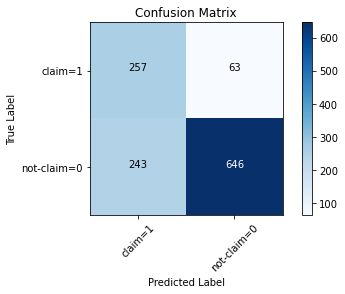

In [26]:
from sklearn.metrics import recall_score, precision_score, f1_score
# Compare the model performance on training and validation parts
print("Training Evaluations")
print("Precision: {:.2f}".format(precision_score(y_train_us, y_train_svm_us_pre)))
print("Recall: {:.2f}".format(recall_score(y_train_us, y_train_svm_us_pre)))
print("F1: {:.2f}".format(f1_score(y_train_us, y_train_svm_us_pre)))

print("Validation Evaluations")
print("Precision: {:.2f}".format(precision_score(y_validation, y_svm_us_pre)))
print("Recall: {:.2f}".format(recall_score(y_validation, y_svm_us_pre)))
print("F1: {:.2f}\n".format(f1_score(y_validation, y_svm_us_pre)))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_svm_us_pre, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['claim=1','not-claim=0'], normalize= False, title='Confusion Matrix')

print (classification_report(y_validation, y_svm_us_pre))

**SVM with SMOTE Train Dataset**

Training Evaluations
Precision: 0.84
Recall: 0.91
F1: 0.87
Validation Evaluations
Precision: 0.54
Recall: 0.69
F1: 0.60

Confusion Matrix without Normalization
[[222  98]
 [192 697]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       889
           1       0.54      0.69      0.60       320

    accuracy                           0.76      1209
   macro avg       0.71      0.74      0.72      1209
weighted avg       0.79      0.76      0.77      1209



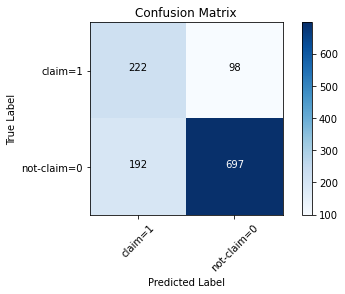

In [27]:
# Compare the model performance on training and validation parts
print("Training Evaluations")
print("Precision: {:.2f}".format(precision_score(y_train_smo, y_train_svm_smo_pre)))
print("Recall: {:.2f}".format(recall_score(y_train_smo, y_train_svm_smo_pre)))
print("F1: {:.2f}".format(f1_score(y_train_smo, y_train_svm_smo_pre)))

print("Validation Evaluations")
print("Precision: {:.2f}".format(precision_score(y_validation, y_svm_smo_pre)))
print("Recall: {:.2f}".format(recall_score(y_validation, y_svm_smo_pre)))
print("F1: {:.2f}\n".format(f1_score(y_validation, y_svm_smo_pre)))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_svm_smo_pre, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['claim=1','not-claim=0'], normalize= False, title='Confusion Matrix')

print (classification_report(y_validation, y_svm_smo_pre))

**LG With Undersampling Train Dataset**

Training Evaluations
Precision: 0.80
Recall: 0.84
F1: 0.82
Validation Evaluations
Precision: 0.51
Recall: 0.80
F1: 0.63

Confusion Matrix without Normalization
[[252  68]
 [250 639]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       889
           1       0.50      0.79      0.61       320

    accuracy                           0.74      1209
   macro avg       0.70      0.75      0.71      1209
weighted avg       0.80      0.74      0.75      1209



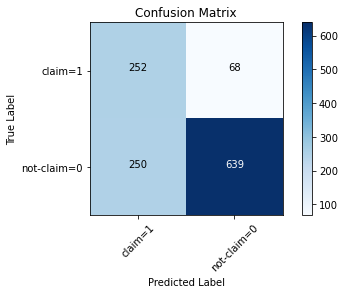

In [28]:
# Compare the model performance on training and validation parts
print("Training Evaluations")
print("Precision: {:.2f}".format(precision_score(y_train_us, y_train_svm_us_pre)))
print("Recall: {:.2f}".format(recall_score(y_train_us, y_train_svm_us_pre)))
print("F1: {:.2f}".format(f1_score(y_train_us, y_train_svm_us_pre)))

print("Validation Evaluations")
print("Precision: {:.2f}".format(precision_score(y_validation, y_svm_us_pre)))
print("Recall: {:.2f}".format(recall_score(y_validation, y_svm_us_pre)))
print("F1: {:.2f}\n".format(f1_score(y_validation, y_svm_us_pre)))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_lg_us_pre, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['claim=1','not-claim=0'], normalize= False, title='Confusion Matrix')

print (classification_report(y_validation, y_lg_us_pre))

**LG with SMOTE Train Dataset**

Training Evaluations
Precision: 0.73
Recall: 0.78
F1: 0.75
Validation Evaluations
Precision: 0.52
Recall: 0.79
F1: 0.62

Confusion Matrix without Normalization
[[252  68]
 [236 653]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       889
           1       0.52      0.79      0.62       320

    accuracy                           0.75      1209
   macro avg       0.71      0.76      0.72      1209
weighted avg       0.80      0.75      0.76      1209



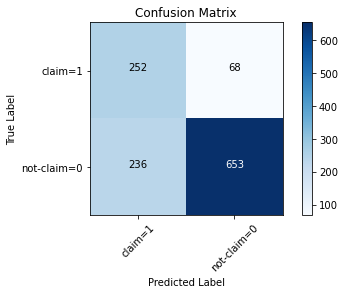

In [29]:
# Compare the model performance on training and validation parts
print("Training Evaluations")
print("Precision: {:.2f}".format(precision_score(y_train_smo, y_train_lg_smo_pre)))
print("Recall: {:.2f}".format(recall_score(y_train_smo, y_train_lg_smo_pre)))
print("F1: {:.2f}".format(f1_score(y_train_smo, y_train_lg_smo_pre)))

print("Validation Evaluations")
print("Precision: {:.2f}".format(precision_score(y_validation, y_lg_smo_pre)))
print("Recall: {:.2f}".format(recall_score(y_validation, y_lg_smo_pre)))
print("F1: {:.2f}\n".format(f1_score(y_validation, y_lg_smo_pre)))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_lg_smo_pre, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['claim=1','not-claim=0'], normalize= False, title='Confusion Matrix')

print (classification_report(y_validation, y_lg_smo_pre))

## 3-2 Conclusions

<font color=blue>1-Different Data Parts:</font>  
<font color=blue>-> the predictions on training parts are better than those on validation parts, which makes sense as the model is fitted by the training dataset.</font>  
<font color=blue>-> the Precisions of the validation parts are from 0.52 to 0.54, which is to say the model has a mediocre precision of not labeling a negative sample as positive.</font>  
<font color=blue>-> the Recalls of the validation parts are from 0.68 to 0.79, which indicates that the model shows the satisfactory ability to find all the positive samples.</font>    
<font color=blue>-> the F1s of the validation parts are from 0.60 to 0.62, demonstrating that the model performs well considering both precision and recall.</font>  

<font color=blue>2-Different Sampling Methods:</font>   
<font color=blue>-> no matter which classification methods are used in this case study, the different sampling methods (between Undersampling and SMOTE) show slight differences on model performance.</font>  


<font color=blue>3-Different Classification Methods:</font>  
<font color=blue>-> no matter which sampling methods are used in this case study, the different classification methods (between SVM and Logistic Regression) show slight differenceson model performance.</font>  

<font color=blue>4-Predictions on "0: not-claim" and "1: claim":</font>  
<font color=blue>-> in general, the insurance company would be more interested to know which clients will claim, this is to say to find the positive samples. Therefore, the Logistic Regression model using Undersampling shows the best ability to find the positive samples with a Recall of 0.82 though it has slightly lower precision on predicted performance (precision=0.5). I will use this model to predict the test_auto dataset. </font>  

# 4-Predict for Test_Auto
## 4-1 Clean and Format the Dataset

<font color=blue>Processes similar to what I did with train_auto.</font>

In [30]:
# Note: test_auto was already imported in the beginning
test_clean = df_test.drop(['TARGET_FLAG','TARGET_AMT'],axis=1)

# Remove the rows containing the missing values
test_clean = test_clean.dropna(axis=0)
test_clean = test_clean.reset_index(drop=True)

# Format the columns representing the amount of money
money_col = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']
# Convert string to number by removing first '$' and ','
for col in money_col:
    test_clean[col]=test_clean[col].str.replace('$', '').str.replace(',','')
    test_clean[col]=pd.to_numeric(test_clean[col])
    
# Format the columns representing categorical variables
cate_col = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY']   
# Remove 'z_' in the category names
for col in cate_col:
    test_clean[col] = test_clean[col].str.replace('z_','')

# Format the columns containing only 2 no order preference categorical variables
# Use Dummy encoding
# Transfer the variables in string into binary values
df_dummy = pd.get_dummies(test_clean[['PARENT1','MSTATUS','SEX','CAR_USE','RED_CAR','REVOKED','URBANICITY']],
                          prefix=['PARENT1','MSTATUS','SEX','CAR_USE','RED_CAR','REVOKED','URBANICITY'], drop_first = True)

# Format the columns containing more than 2 no order preference categorical variables
# Use One Hot encoding
# Transfer the variables in string into binary values
df_onehot = pd.get_dummies(test_clean[['JOB','CAR_TYPE']], prefix=['JOB','CAR_TYPE'])

# Format the columns containing order preference categorical variables
# Use Label encoding
# Transfer the variables in string into numerical values
df_label = LabelEncoder()
test_clean['EDUCATION'] = df_label.fit_transform(test_clean['EDUCATION'])
test_clean['EDUCATION'].unique()

# Outliers in test dataset
test_clean.describe()

,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000
mean,5113.642680,0.168114,44.970844,0.730149,10.297767,56724.777295,149866.652605,1.725806,33.572581,14993.722084,5.307072,4116.844293,0.813896,1.785360,7.787841
std,2943.560038,0.495442,8.551216,1.115773,4.285952,44496.547925,125621.058155,1.132667,15.739076,8189.221030,4.072359,8753.089837,1.143402,2.245588,5.610768
min,3.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2638.000000,0.000000,39.000000,0.000000,9.000000,24337.500000,0.000000,1.000000,23.000000,8750.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5196.000000,0.000000,45.000000,0.000000,11.000000,49225.000000,155557.500000,2.000000,33.000000,13820.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7634.750000,0.000000,51.000000,1.250000,13.000000,80133.500000,231511.250000,2.000000,43.000000,20042.500000,7.000000,4826.000000,2.000000,3.000000,12.000000
max,10300.000000,3.000000,73.000000,5.000000,19.000000,284898.000000,645241.000000,4.000000,105.000000,45420.000000,25.000000,54399.000000,5.000000,12.000000,24.000000


no outliers

In [31]:
# Create a new dataframe to keep the processed feature columns
X_test = pd.DataFrame(index=test_clean.index)
# 1-Add the columms containing the numerical values into the new dataset
processed_col = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','EDUCATION','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE']
for col in processed_col:
    X_test[col] = test_clean[col]
# 2-Add the columns which were the categorical columns
df_cate = pd.merge(df_dummy,df_onehot,right_index=True,left_index=True)
X_test = pd.merge(X_test,df_cate,right_index=True,left_index=True)
X_test

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,TRAVTIME,BLUEBOOK,TIF,...,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van
0,0,48.0,0,11.0,52881,0,1,26,21970,1,...,0,1,0,0,0,0,0,0,0,1
1,1,40.0,1,11.0,50815,0,2,21,18930,6,...,0,1,0,0,1,0,0,0,0,0
2,0,44.0,2,12.0,43486,0,2,30,5900,10,...,0,0,0,0,0,0,0,1,0,0
3,0,59.0,0,12.0,87460,0,2,45,15420,1,...,0,1,0,0,1,0,0,0,0,0
4,0,60.0,0,12.0,37940,182739,2,16,11290,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0,41.0,0,9.0,126829,334777,3,9,18280,4,...,0,1,0,0,1,0,0,0,0,0
1608,0,46.0,0,0.0,0,0,2,32,1500,6,...,0,0,0,1,0,0,0,0,1,0
1609,0,46.0,0,12.0,43501,134977,2,60,16080,3,...,0,0,1,0,1,0,0,0,0,0
1610,0,55.0,0,10.0,141083,393624,3,42,21110,10,...,1,0,0,0,0,0,0,0,1,0


In [32]:
# Normalize the dataset
from sklearn import preprocessing
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

## 4-2 Predict

<font color=blue>I will use the Logistic Regression Classification with Undersampling method.</font>

In [33]:
#Predict
y_test_pred = clf_lg_us.predict(X_test)

# Check the positive predicts
print(f'There are {y_test_pred.sum()} "Claim", accounting {y_test_pred.sum() / len(X_test)* 100:.1f}% of the test dataset.')

There are 718 "Claim", accounting 44.5% of the test dataset.


## 4-3 Export Results

In [34]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.columns = ['TARGET_FLAG']
y_test_pred.set_index(test_clean["INDEX"], inplace=True)
y_test_pred.to_csv('test_auto prediction_XW.csv', index=True, index_label="INDEX")